# Detailed Iris Species Classification using Decision Tree Classifier

This notebook provides a comprehensive analysis of the Iris dataset using a Decision Tree Classifier. 
We will cover data exploration, preprocessing, model training, evaluation, and interpretation.

## Table of Contents
1. [Import Libraries](#Import-Libraries)
2. [Load and Explore Dataset](#Load-and-Explore-Dataset)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Split Data](#Split-Data)
5. [Train Decision Tree Classifier](#Train-Decision-Tree-Classifier)
6. [Make Predictions](#Make-Predictions)
7. [Evaluate Model](#Evaluate-Model)
8. [Feature Importance](#Feature-Importance)
9. [Example Predictions](#Example-Predictions)
10. [Summary](#Summary)

## Import Libraries

We start by importing all necessary libraries for data manipulation, visualization, and machine learning.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Set up matplotlib for inline plotting in Jupyter
%matplotlib inline

# Set seaborn style for better visualizations
sns.set_style("whitegrid")

## Load and Explore Dataset

In this section, we load the Iris dataset and perform initial exploration to understand its structure, content, and basic statistics.

In [7]:
# Step 2: Data Preprocessing (Fixed Version)
print("\nStep 2: Data Preprocessing...")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop the 'Id' column as it's not useful for prediction (if it exists)
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)
    print("\nDropped 'Id' column")
else:
    print("\n'Id' column already removed")

# Encode the target variable (Species) from categorical to numerical
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])
print("\nLabel encoding mapping:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species}: {i}")

# Separate features and target variable
X = df.drop(['Species', 'Species_encoded'], axis=1)  # Features
y = df['Species_encoded']  # Target variable

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Features: {X.columns.tolist()}")



Step 2: Data Preprocessing...
Missing values in each column:
SepalLengthCm      0
SepalWidthCm       0
PetalLengthCm      0
PetalWidthCm       0
Species            0
Species_encoded    0
dtype: int64

'Id' column already removed

Label encoding mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2

Feature matrix shape: (150, 4)
Target variable shape: (150,)
Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [8]:
# Step 1: Load and explore the dataset
print("Step 1: Loading and exploring the dataset...")
df = pd.read_csv("Iris.csv")
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nStatistical summary:")
print(df.describe())
print("\nClass distribution:")
print(df['Species'].value_counts())

Step 1: Loading and exploring the dataset...
Dataset shape: (150, 6)

First 5 rows:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        

## Data Preprocessing

Data preprocessing involves cleaning the data and preparing it for machine learning. This includes handling missing values, removing unnecessary columns, and encoding categorical variables.

In [9]:
# Step 2: Data Preprocessing
print("\nStep 2: Data Preprocessing...")

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Drop the 'Id' column as it's not useful for prediction
df = df.drop('Id', axis=1)
print("\nDropped 'Id' column")

# Encode the target variable (Species) from categorical to numerical
label_encoder = LabelEncoder()
df['Species_encoded'] = label_encoder.fit_transform(df['Species'])
print("\nLabel encoding mapping:")
for i, species in enumerate(label_encoder.classes_):
    print(f"{species}: {i}")

# Separate features and target variable
X = df.drop(['Species', 'Species_encoded'], axis=1)  # Features
y = df['Species_encoded']  # Target variable

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target variable shape: {y.shape}")
print(f"Features: {X.columns.tolist()}")


Step 2: Data Preprocessing...
Missing values in each column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Dropped 'Id' column

Label encoding mapping:
Iris-setosa: 0
Iris-versicolor: 1
Iris-virginica: 2

Feature matrix shape: (150, 4)
Target variable shape: (150,)
Features: ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


## Split Data

We split the dataset into training and testing sets to evaluate the model's performance on unseen data. Using stratification ensures balanced class distribution in both sets.

In [10]:
# Step 3: Split the data into training and testing sets
print("\nStep 3: Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # 70% training, 30% testing
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class distribution in splits
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training set class distribution:\n{pd.Series(y_train).value_counts()}")
print(f"Testing set class distribution:\n{pd.Series(y_test).value_counts()}")


Step 3: Splitting data into training and testing sets...
Training set size: 105
Testing set size: 45
Training set class distribution:
Species_encoded
1    35
0    35
2    35
Name: count, dtype: int64
Testing set class distribution:
Species_encoded
2    15
1    15
0    15
Name: count, dtype: int64


## Train Decision Tree Classifier

We initialize and train a Decision Tree Classifier. The max_depth parameter is set to prevent overfitting by limiting the tree's complexity.

In [11]:
# Step 4: Train the Decision Tree Classifier
print("\nStep 4: Training Decision Tree Classifier...")
# Create decision tree classifier
dt_classifier = DecisionTreeClassifier(
    random_state=42,  # For reproducibility
    max_depth=3  # Limit tree depth to prevent overfitting
)

# Train the model
dt_classifier.fit(X_train, y_train)
print("Decision Tree classifier trained successfully!")


Step 4: Training Decision Tree Classifier...
Decision Tree classifier trained successfully!


## Make Predictions

Using the trained model, we make predictions on the test set and display some examples to see how the model performs.

In [12]:
# Step 5: Make predictions
print("\nStep 5: Making predictions...")
y_pred = dt_classifier.predict(X_test)
y_pred_proba = dt_classifier.predict_proba(X_test)

print("First 5 predictions:")
for i in range(5):
    actual_species = label_encoder.inverse_transform([y_test.iloc[i]])[0]
    predicted_species = label_encoder.inverse_transform([y_pred[i]])[0]
    print(f"Sample {i+1}: Actual: {actual_species}, Predicted: {predicted_species}")


Step 5: Making predictions...
First 5 predictions:
Sample 1: Actual: Iris-virginica, Predicted: Iris-virginica
Sample 2: Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample 3: Actual: Iris-virginica, Predicted: Iris-virginica
Sample 4: Actual: Iris-versicolor, Predicted: Iris-versicolor
Sample 5: Actual: Iris-virginica, Predicted: Iris-virginica


## Evaluate Model

Model evaluation involves calculating various metrics and visualizing the results. We use accuracy, precision, recall, classification report, and confusion matrix.


Step 6: Model Evaluation...
Accuracy: 0.9778
Precision: 0.9792
Recall: 0.9778

Detailed Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix:


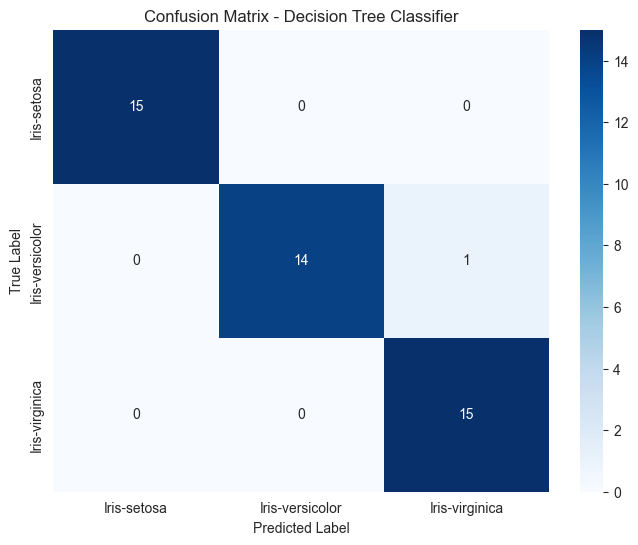

In [13]:
# Step 6: Evaluate the model
print("\nStep 6: Model Evaluation...")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# Detailed classification report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Feature Importance

Understanding which features are most important for the model's decisions helps in interpreting the results and potentially improving the model.


Step 7: Feature Importance Analysis...
Feature Importance:
         feature  importance
2  PetalLengthCm    0.550877
3   PetalWidthCm    0.449123
0  SepalLengthCm    0.000000
1   SepalWidthCm    0.000000


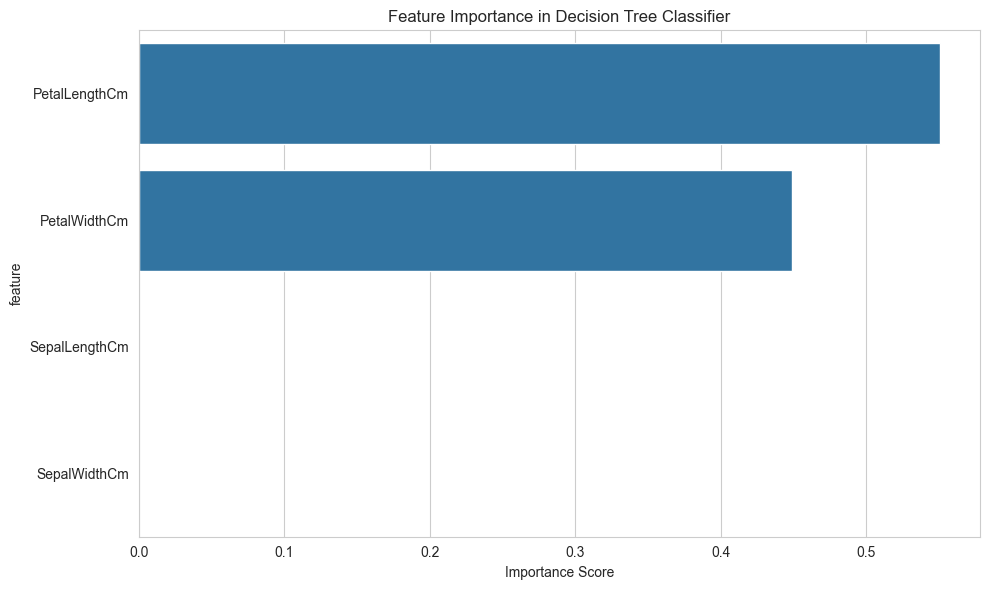

In [14]:
# Step 7: Feature Importance
print("\nStep 7: Feature Importance Analysis...")
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_classifier.feature_importances_
}).sort_values('importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

## Example Predictions

We demonstrate how to use the trained model to make predictions on new, unseen data points.

In [15]:
# Step 8: Example predictions on new data
print("\nStep 8: Example of making predictions on new data...")
# Create some example measurements
new_samples = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Likely Iris-setosa
    [6.0, 2.7, 5.1, 1.6],  # Likely Iris-versicolor
    [7.2, 3.6, 6.1, 2.5]   # Likely Iris-virginica
])

new_predictions = dt_classifier.predict(new_samples)
new_probabilities = dt_classifier.predict_proba(new_samples)

print("Predictions for new samples:")
for i, (pred, probs) in enumerate(zip(new_predictions, new_probabilities)):
    species_name = label_encoder.inverse_transform([pred])[0]
    print(f"\nSample {i+1}: {new_samples[i]}")
    print(f"Predicted species: {species_name}")
    print("Probability distribution:")
    for j, prob in enumerate(probs):
        species = label_encoder.inverse_transform([j])[0]
        print(f"  {species}: {prob:.4f}")


Step 8: Example of making predictions on new data...
Predictions for new samples:

Sample 1: [5.1 3.5 1.4 0.2]
Predicted species: Iris-setosa
Probability distribution:
  Iris-setosa: 1.0000
  Iris-versicolor: 0.0000
  Iris-virginica: 0.0000

Sample 2: [6.  2.7 5.1 1.6]
Predicted species: Iris-versicolor
Probability distribution:
  Iris-setosa: 0.0000
  Iris-versicolor: 0.5000
  Iris-virginica: 0.5000

Sample 3: [7.2 3.6 6.1 2.5]
Predicted species: Iris-virginica
Probability distribution:
  Iris-setosa: 0.0000
  Iris-versicolor: 0.0294
  Iris-virginica: 0.9706


c:\Users\Peter Mwaura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Peter Mwaura\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Summary

This section provides a final summary of the entire analysis, including key findings and model performance.

In [16]:
# Summary
print("\n" + "="*50)
print("SUMMARY")
print("="*50)
print(f"Model: Decision Tree Classifier")
print(f"Dataset: Iris Species (150 samples, 3 classes)")
print(f"Best performing feature: {feature_importance.iloc[0]['feature']}")
print(f"Final Accuracy: {accuracy:.4f}")
print(f"Model is {'GOOD' if accuracy > 0.9 else 'NEEDS IMPROVEMENT'}")


SUMMARY
Model: Decision Tree Classifier
Dataset: Iris Species (150 samples, 3 classes)
Best performing feature: PetalLengthCm
Final Accuracy: 0.9778
Model is GOOD
